# [Техническое задание](https://docs.google.com/document/d/1ZIu6daXZRuDR796AHjKCku643hlM3xgYxW9E84DBJFc/edit?usp=sharing)

**Проект:** Классификация аудиозвонков на целевые и нецелевые.

**Цель проекта:** Разработать нейронную сеть, способную классифицировать аудиозвонки на целевые и нецелевые на основе предоставленной базы данных и csv-таблицы с описаниями и метками классов.

**Введение:**

Входной набор данных представляет из себя два набора файлов:

> a)	[Первый набор файлов](https://drive.google.com/drive/folders/1cQWMpQkscZJbbOTxiJNy0o3nuaeIiB1P?usp=sharing) - это выгрузки в формате `CSV` с информацией по звонкам, а так же с проставленным статусом `“целевой/нецелевой”` в отдельном столбце (обратите внимание, что по проекту `“Павелецкая сити”` две выгрузки - эти наборы данных отличаются и относятся к разным наборам клиентов внутри одного и того же проекта).

> b)	[Второй набор файлов](https://drive.google.com/drive/folders/1K3jGCH60uzFcsI3aj89VIXOOFEXvZxD6?usp=sharing) - аудиозаписи звонков. Они хранятся в корневом каталоге в одноимённых папках. К примеру, в папке `“Записи звонков_павелецкая сити”` лежат записи звонков по проекту `“Павелецкая Сити”`.

**Требования:**

1.   Нейронная сеть должна быть спроектирована и обучена для точной классификации аудиозвонков на два класса: целевые и нецелевые (с точностью `90+%`).
2.   Необходимо обеспечить интеграцию модели через `API`.
3.   Модель должна быть оптимизирована для обработки большого объёма данных.
4.   Код должен быть написан с соблюдением стандартов кодирования, и должна быть составлена подробная техническая документация.
5.   Код должен включать в себя систему журналирования для фиксации ошибок.
6.   Код должен принимать на вход регулярное выражение, по которому будет осуществляться проверка столбца `“теги”` в выгрузках `CSV` для определения статуса звонка `“целевой/нецелевой”`:

>> a)	по проектам `“Примавера”` и `“Павелецкая сити”` наличие в столбце с тегами подстроки `“Целевой_М108“` будет равняться тому, что данный звонок целевой (пример регулярного выражения: `.*Целевой_М108.*`);

>> b)	по проекту `“Хедлайнер”` - наличие в столбце с тегами подстроки `“первичный целевой“` будет равняться тому, что данный звонок целевой.

7.   После реализации необходимо иметь возможность получения поддержки по предоставленному решению в течение `2 месяцев`.

Список рекомендуемых параметров для звуковой записи (данный список носит информационный характер и не является обязательным):

*   Эмоция (базовые 11: радость; печаль; гнев; отвращение; удивление; страдание (горе); волнение (интерес); презрение; смущение; стыд; вина).
*   Пол.
*   Возраст.
*   Семантический анализ диалога (по конкретным ключевым словам и/или по тематикам диалогов).
*   Характеристики, присутствующие в `CSV`/`XLSX` таблицах.

# Критерии классификации

Критерии `уникально-целевого` обращения:
1. Длительность звонка должна быть не менее `75 секунд`;
2. Телефонный номер абонента должен быть `уникальным`, т. е. его не должно быть в `CRM` заказчика. Либо, по нему не должно быть активности за последние `90 дней`. Исключение составляют `топовые площадки`, работающие по своим критериям (`ЦИАН`, `Яндекс.Недвижимость`, `Авито`, и т. д.);
3. Клиент должен знать минимальную информацию об объекте (понимать, куда он звонит): название `ЖК`, расположение, ценовую политику;
4. Номер абонента должен быть доступен в течение `15 дней` после совершённого звонка (при этом со стороны заказчика должно быть обеспечено `2 попытки` исходящего звонка в течение указанного срока);
5. Клиент должен быть `«адекватным»`. Не общаться на повышенных тонах, не употреблять ненормативную лексику и т. д.;
6. Клиент не должен быть повторным. Например, клиент `уже` купил квартиру и через `90 дней` решил купить машиноместо;
7. Заявка. В заявке должен быть указан номер телефона, а абонент при контакте с менеджером должен соответствовать всем критериям `уникально-целевого` обращения, перечисленным выше;
8. Озвученный общий бюджет покупки не должен быть `ниже 90%` от стоимости квартиры или коммерческого помещения, соответствующих площади/комнатности на момент обращения;
9. В случае, если клиент является уникальным, интересуется покупкой недвижимости, не является представителем партнёров или исполнителей и изъявил желание посетить офис продаж. При этом не обязательна фиксация уровня знания клиента об объекте в диалоге. При этом источник не должен относиться к каналам `«лидогенерация»` или `«тематические площадки»`;
10. Основной целью звонка клиента не должна являться покупка/аренда исключительно нежилого помещения, если это не являлось целью проводимой рекламной кампании.

Критерии НЕ `уникально-целевого` (вторичного) обращения:
1. Клиент позвонил повторно менее чем через `3 месяца` (`90 дней`) с момента последнего обращения;
2. Клиент, либо члены его семьи, уже купил (купили) `квартиру`/`машиноместо`/`кладовое помещение`, и хочет (хотят) совершить ещё одну покупку. В данном случае клиент относится к показателю `LTV` (показатель прибыли, которую компания получает от одного клиента за всё время работы с ним).

# [Датафреймы](https://drive.google.com/drive/folders/111abiHt33Q-SV48pBPhEgDCZDI5KshnF?usp=sharing)

## Headliner

*   [`Headliner_df.pkl` Информация о звонках `Headliner`](https://drive.google.com/file/d/13mUHwvx79O4P-AucRdjBYkN5ha8LnCSp/view?usp=sharing)
*   [`Headliner_new_df.pkl` Информация о новых звонках `Headliner`](https://drive.google.com/file/d/1-Q1BxLbot7svY5hiqOquHRFvSOcwtpKS/view?usp=sharing)

*   [`Headliner_calls_df.pkl` Файлы записей звонков `Headliner`](https://drive.google.com/file/d/13pmGEYacsEHjYsIsYgf6fg4MUHAw509y/view?usp=sharing)
*   [`Headliner_new_calls_df.pkl` Файлы записей новых звонков `Headliner`](https://drive.google.com/file/d/1-Ke1q42th_NV0og0e01_-mvJ8HL8JzfS/view?usp=sharing)
*   [`Headliner_transcriptions_df` Файлы транскрибации записей звонков `Headliner`](https://drive.google.com/file/d/1ThU49xWSv3T-HK61jRykOR3UDvOVeO4i/view?usp=sharing)
*   [`Headliner_new_transcriptions_df.pkl` Файлы транскрибации новых записей звонков `Headliner`](https://drive.google.com/file/d/1-BSmmymyVo8VYyvDXsO1ybXldOJ5eUaH/view?usp=sharing)

*   [`Headliner_all_df.pkl` Информация о всех звонках `Headliner`](https://drive.google.com/file/d/1857LwaVtJ364yFMpXemILSuVu84YEPPw/view?usp=sharing)
*   [`Headliner_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Headliner`](https://drive.google.com/file/d/1-HOWuSAngv9dXYiMlyRXX0kmVVAAT4sV/view?usp=sharing)
*   [`Headliner_targets_df.pkl` Целевые звонки `Headliner`](https://drive.google.com/file/d/1-J1gcgb2mrNDx3R_3l12kq0htS8PTkSv/view?usp=sharing)
*   [`Headliner_not_targets_df.pkl` Нецелевые звонки `Headliner`](https://drive.google.com/file/d/1dGf3UrVeQg0VfFhBL_lZfm-gaczPYBnL/view?usp=sharing)
*   [`Headliner_moot_df.pkl` Спорные звонки `Headliner`](https://drive.google.com/file/d/1-7vtN8vJNWgWfY8JE8bqoRXkUpvRE_og/view?usp=sharing)

## Primavera

*   [`Primavera_df.pkl` Информация о звонках `Primavera`](https://drive.google.com/file/d/1-3csPnjIJXviKJzvbpCfOm29nBgl8L4Q/view?usp=sharing)
*   [`Primavera_new_df.pkl` Информация о новых звонках `Primavera`](https://drive.google.com/file/d/1-QmWkabU2_cyrXPeVaiHSt2e6sLuiCtp/view?usp=sharing)

*   [`Primavera_calls_df.pkl` Файлы записей звонков `Primavera`](https://drive.google.com/file/d/1-CLRfPyaGSc61OopNuFRlWTG-CBCaM1F/view?usp=sharing)
*   [`Primavera_new_calls_df.pkl` Файлы записей новых звонков `Primavera`](https://drive.google.com/file/d/1-Lxa0KifMiByareL94rdEzEpvvMj4D1T/view?usp=sharing)
*   [`Primavera_transcriptions_df` Файлы транскрибации записей звонков `Primavera`](https://drive.google.com/file/d/1-21AcHmdkRhKmL0uwWOJ0jHyY8sj1tME/view?usp=sharing)
*   [`Primavera_new_transcriptions_df.pkl` Файлы транскрибации новых записей звонков `Primavera`](https://drive.google.com/file/d/1-BtSBVH2JXol5JDA0GKV4NOIz5WUnUd5/view?usp=sharing)

*   [`Primavera_all_df.pkl` Информация о всех звонках `Primavera`](https://drive.google.com/file/d/1-2-RlxkKHj5e6RkvbrN7_vs1h5aVXJFk/view?usp=sharing)
*   [`Primavera_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Primavera`](https://drive.google.com/file/d/1-INI9JsU9jsOkPDiGMKhftt18KXgF6-K/view?usp=sharing)
*   [`Primavera_targets_df.pkl` Целевые звонки `Primavera`](https://drive.google.com/file/d/1-JVtM9fOr6XoM7MVxkoVsYfwdZ6GQ--i/view?usp=sharing)
*   [`Primavera_not_targets_df.pkl` Нецелевые звонки `Primavera`](https://drive.google.com/file/d/1-KwG8M-0wEn-5C4ta-B8_xYGCXDOhpnH/view?usp=sharing)

## Paveletskaya_city

*   [`Paveletskaya_city_df.pkl` Информация о звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-99dLkSvU3wdwjkGJpwpYUXQjxx8dwEu/view?usp=sharing)
*   [`Paveletskaya_df.pkl` Информация о звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-D6LlCFXQBMHceujvnq9H8rlx2jAnzmT/view?usp=sharing)
*   [`Paveletskaya_city_new_df.pkl` Информация о новых звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-Rtw9a1no3mKatUjc_FNv_bgUBdNrs_d/view?usp=sharing)

*   [`Paveletskaya_city_calls_df.pkl` Файлы записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-JevsfOpxzLNZmSs34qrswhGzhPwf69S/view?usp=sharing)
*   [`Paveletskaya_city_new_calls_df.pkl` Файлы записей новых звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-ODEeFLv15DN5bfLlwyrTx8D3yxydhP9/view?usp=sharing)
*   [`Paveletskaya_city_transcriptions_df` Файлы транскрибации записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-2kqmIGIraP70ekXB6LBqNjwaTnoxyk5/view?usp=sharing)
*   [`Paveletskaya_city_new_transcriptions_df.pkl` Файлы транскрибации новых записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-EfA8ZCpGNQk__puhiv1FuxoZC0rXxpj/view?usp=sharing)

*   [`Paveletskaya_city_all_df.pkl` Информация о всех звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-Cy78DqRZ3sbIHkg25wzVWPL-lST5oQa/view?usp=sharing)
*   [`Paveletskaya_city_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-J1BoALFH4-HRdVXjnkyr-fExmtQpUc7/view?usp=sharing)
*   [`Paveletskaya_city_targets_df.pkl` Целевые звонки `Paveletskaya_city`](https://drive.google.com/file/d/1-MrjnBHDj65CEjJxLfPnp-hq07V_wtZK/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_df.pkl` Нецелевые звонки `Paveletskaya_city`](https://drive.google.com/file/d/1-WCCyYaorHkBYoh5ugNsCkD7cb1PKH6D/view?usp=sharing)

## Сводные датафреймы

*   [`total_df.pkl` Сводный датафрейм с информацией о всех звонках](https://drive.google.com/file/d/15ijhw62sp2JNH6pryqZtM5akQHUnsTzi/view?usp=sharing)
*   [`total_work_df.pkl` Сводный рабочий датафрейм с информацией о всех звонках](https://drive.google.com/file/d/1-056tLrjP5yRQW8yRtwutvXs3zmPulW7/view?usp=sharing)

# 6 неделя

In [1]:
!rm -r sample_data

In [2]:
# Подключаем google-диск
from google.colab import drive
drive.mount('/content/drive')
my_drv_path = '/content/drive/MyDrive/'

Mounted at /content/drive


## Библиотеки и переменные

In [3]:
import os            # для работы с операционной системой
import pickle as pkl # для сохранения и загрузки переменных
import pandas as pd  # для работы с таблицами
import numpy  as np  # для работы с массивами
import re            # для работы с регулярными выражениями

# Параметры отображения датафреймов
pd.options.display.max_rows     = 99
pd.options.display.max_columns  = 99
pd.options.display.max_colwidth = 999

work_dir_path              = my_drv_path           + 'media108.ru/Новички/'                # путь к рабочей папке
df_path                    = work_dir_path         + 'Датафреймы/'                         # путь к папке для датафреймов
table_path                 = work_dir_path         + 'Таблицы/'                            # путь к папке для таблиц
model_path                 = work_dir_path         + 'Модели/'                             # путь к папке для моделей нейронных сетей
all_dataset_path           = work_dir_path         + 'Датасет/'                            # путь к папке всего датасета в целом
dataset_path               = all_dataset_path      + 'Записи звонков/'                     # путь к записям звонков
dataset_info_path          = dataset_path          + 'Информация о звонках/'               # путь к информации о звонках
dataset_new_path           = all_dataset_path      + 'Новые записи звонков/'               # путь к новым записям звонков
dataset_new_info_path      = dataset_new_path      + 'Информация о звонках/'               # путь к информации о новых звонках
Headliner_path             = dataset_path          + 'Записи звонков_хедлайнер'            # путь к записям звонков проекта Headliner
Headliner_info             = dataset_info_path     + 'Headliner.csv'                       # путь к информации о звонках проекта Headliner
Headliner_new_path         = dataset_new_path      + 'Записи Headliner'                    # путь к записям новых звонков проекта Headliner
Headliner_new_info         = dataset_new_info_path + 'Headliner.xlsx'                      # путь к информации о новых звонках проекта Headliner
Primavera_path             = dataset_path          + 'Записи звонков_primavera'            # путь к записям звонков проекта Primavera
Primavera_info             = dataset_info_path     + 'Primavera .csv'                      # путь к информации о звонках проекта Primavera
Primavera_new_path         = dataset_new_path      + 'Записи Primavera'                    # путь к записям новых звонков проекта Primavera
Primavera_new_info         = dataset_new_info_path + 'Примавера.xlsx'                      # путь к информации о новых звонках проекта Primavera
Paveletskaya_city_path     = dataset_path          + 'Записи звонков_павелецкая сити'      # путь к записям звонков проекта Paveletskaya_city
Paveletskaya_city_info     = dataset_info_path     + 'Павелецкая_ЖК_«Павелецкая_сити».csv' # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_info          = dataset_info_path     + 'Павелецкая (pavcity.turbo.site).csv' # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_city_new_path = dataset_new_path      + 'Записи Павелецкая сити'              # путь к записям новых звонков проекта Paveletskaya_city
Paveletskaya_city_new_info = dataset_new_info_path + 'Павелецкая сити.xlsx'                # путь к информации о новых звонках проекта Paveletskaya_city

## [Классификация текста с использованием моделей трансформеров](https://habr.com/ru/articles/655517/)

In [4]:
# Установка transformers
!pip -q install transformers

### Данные

In [15]:
# Загрузка датафрейма с данными о звонках
with open(df_path + 'total_work_df.pkl', 'rb') as f:
  total_work_df = pkl.load(f)
total_work_df.shape

(6924, 78)

In [16]:
# Выборка с текстами транскрибации и классом звонка
df = total_work_df[['Текст whisper-транскрибации записи звонка', 'Класс']][total_work_df['Файл записи звонка'] != 'нет файла']
df.shape

(6924, 2)

<Axes: >

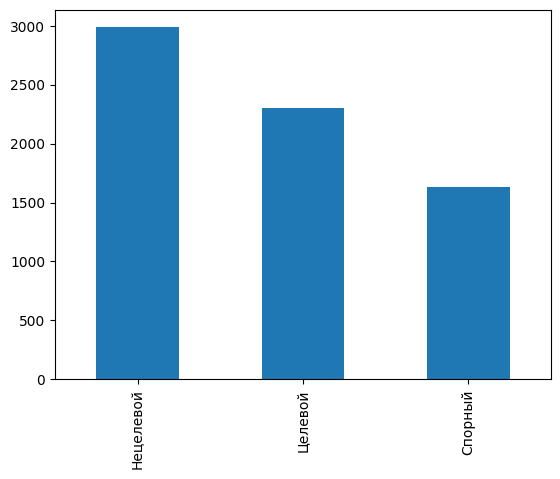

In [17]:
# Соотношение классов
df['Класс'].value_counts().plot.bar()

In [18]:
# Преобразуем значения класса в число
df['Класс'] = df['Класс'].apply(lambda x: 1 if x == 'Целевой' else 0)

<Axes: >

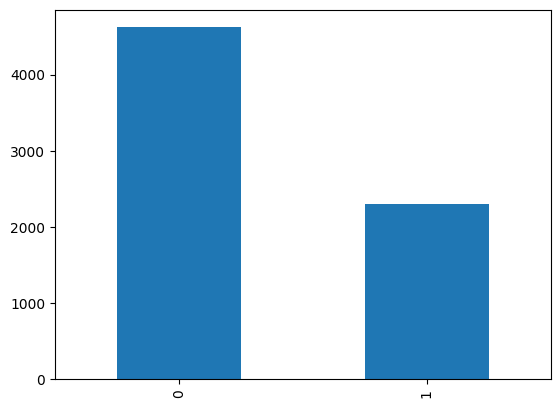

In [19]:
# Соотношение классов
df['Класс'].value_counts().plot.bar()

In [20]:
# Разделение датасета на обучающую, проверочную и тестовую выборки
from sklearn.model_selection import train_test_split
tr_df, val_df     = train_test_split(df,    test_size=0.2,  random_state=42, stratify=df['Класс'])
train_df, test_df = train_test_split(tr_df, test_size=0.25, random_state=42, stratify=tr_df['Класс'])
train_df.shape[0], val_df.shape[0], test_df.shape[0]

(4154, 1385, 1385)

In [21]:
# Токенизируем тексты, передаём в тензоры и загружаем в функцию DataLoader, которая будет по частям подавать данные для обучения и валидации в модель
import torch
from   torch.utils.data import TensorDataset, RandomSampler, DataLoader, SequentialSampler
from   transformers     import BertTokenizer

train_text       = train_df['Текст whisper-транскрибации записи звонка'].astype('str')
train_labels     = train_df['Класс']
val_text         = val_df  ['Текст whisper-транскрибации записи звонка'].astype('str')
val_labels       = val_df  ['Класс']
test_text        = test_df ['Текст whisper-транскрибации записи звонка'].astype('str')
test_labels      = test_df ['Класс']

tokenizer        = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

tokens_train     = tokenizer.batch_encode_plus(train_text.values,
                                           max_length=512,
                                           padding='max_length',
                                           truncation=True)

tokens_val       = tokenizer.batch_encode_plus(val_text.values,
                                           max_length=512,
                                           padding='max_length',
                                           truncation=True)

tokens_test      = tokenizer.batch_encode_plus(test_text.values,
                                           max_length=512,
                                           padding='max_length',
                                           truncation=True)

train_seq        = torch.tensor(tokens_train['input_ids'])
train_mask       = torch.tensor(tokens_train['attention_mask'])
train_y          = torch.tensor(train_labels.values)

val_seq          = torch.tensor(tokens_val['input_ids'])
val_mask         = torch.tensor(tokens_val['attention_mask'])
val_y            = torch.tensor(val_labels.values)

test_seq         = torch.tensor(tokens_test['input_ids'])
test_mask        = torch.tensor(tokens_test['attention_mask'])
test_y           = torch.tensor(test_labels.values)

batch_size       = 8

train_data       = TensorDataset(train_seq, train_mask, train_y)
train_sampler    = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler = train_sampler, batch_size = batch_size)

val_data         = TensorDataset(val_seq, val_mask, val_y)
val_sampler      = SequentialSampler(val_data)
val_dataloader   = DataLoader(val_data, sampler = val_sampler, batch_size = batch_size)

tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

<Axes: >

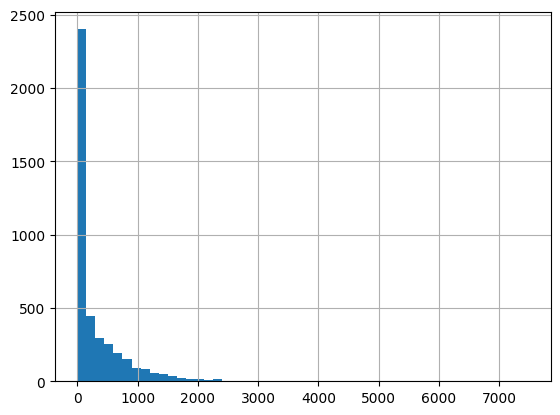

In [22]:
# Гистограмма длины текстов
seq_len = [len(str(i).split()) for i in train_text]
pd.Series(seq_len).hist(bins = 50)

### Модель

In [23]:
# Импортируем предобученную модель
from transformers import AutoModel
bert = AutoModel.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

pytorch_model.bin:   0%|          | 0.00/711M [00:00<?, ?B/s]

In [24]:
# Архитектура
bert.cuda()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
 

In [25]:
# Сам BERT обучать не будем, добавим к его выходу свои слои, которые и будем обучать
for param in bert.parameters():
  param.requires_grad = False

import torch.nn as nn
class BERT_Arch(nn.Module):
  def __init__(self, bert):
    super(BERT_Arch, self).__init__()
    self.bert = bert
    self.dropout = nn.Dropout(0.1)
    self.relu = nn.ReLU()
    self.fc1 = nn.Linear(768,512)
    self.fc2 = nn.Linear(512,2)
    self.softmax = nn.LogSoftmax(dim = 1)
  def forward(self, sent_id, mask):
    _, cls_hs = self.bert(sent_id, attention_mask = mask, return_dict = False)
    x = self.fc1(cls_hs)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc2(x)
    x = self.softmax(x)
    return x

In [26]:
# Объявляем модель и загружаем её в GPU
device = torch.device('cuda')
model  = BERT_Arch(bert)
model  = model.to(device)

In [27]:
# Для борьбы с дисбалансом классов используем следующий подход
import numpy as np
from   sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
weights = torch.tensor(class_weights, dtype = torch.float)
weights = weights.to(device)
cross_entropy = nn.CrossEntropyLoss()
epochs = 25
print(class_weights)

[0.7492785  1.50289436]


In [28]:
# Импортируем оптимизатор
from torch.optim import AdamW
optimizer = AdamW(model.parameters(), lr=1e-3)

In [29]:
# Функция для обучения модели
from tqdm import tqdm
def train():
  model.train()
  total_loss, total_accuracy = 0, 0
  total_preds = []

  for step, batch in tqdm(enumerate(train_dataloader), total = len(train_dataloader)):
    batch = [r.to(device) for r in batch]
    sent_id,mask,labels = batch
    model.zero_grad()
    preds = model(sent_id, mask)
    loss = cross_entropy(preds, labels)
    total_loss += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
    preds = preds.detach().cpu().numpy()
    total_preds.append(preds)

  avg_loss = total_loss / len(train_dataloader)
  total_preds = np.concatenate(total_preds, axis = 0)

  return avg_loss, total_preds

In [30]:
# Функция валидации
def evaluate():
  model.eval()
  total_loss, total_accuracy = 0,0
  total_preds = []

  for step, batch in tqdm(enumerate(val_dataloader), total = len(val_dataloader)):
    batch = [t.to(device) for t in batch]
    sent_id, mask, labels = batch

    with torch.no_grad():
      preds = model(sent_id, mask)
      loss = cross_entropy(preds, labels)
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
      total_preds.append(preds)

  avg_loss = total_loss / len(val_dataloader)
  total_preds = np.concatenate(total_preds, axis = 0)

  return avg_loss, total_preds

In [31]:
# Обучаем, для лучшей метрики на валидации сохраняем веса
best_valid_loss = float('inf')
best_loss       = float('inf')

train_losses    = []
valid_losses    = []

for epoch in range(epochs):
  print('\n Epoch{:} / {:}'.format(epoch+1, epochs))

  train_loss, _ = train()
  valid_loss, _ = evaluate()

  if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict(), '/content/drive/MyDrive/media108.ru/Модели/bert_saved_weights.pt')

  if valid_loss == best_valid_loss:
    if train_loss < best_loss:
      best_loss = train_loss
      torch.save(model.state_dict(), '/content/drive/MyDrive/media108.ru/Модели/bert_saved_weights.pt')

  train_losses.append(train_loss)
  valid_losses.append(valid_loss)
  print(f'\nTraining loss: {train_loss:.3f}')
  print(f'Validation loss: {valid_loss:.3f}')


 Epoch1 / 25


100%|██████████| 174/174 [00:43<00:00,  3.99it/s]



Training loss: 0.374
Validation loss: 0.405

 Epoch2 / 25


100%|██████████| 174/174 [00:46<00:00,  3.77it/s]



Training loss: 0.364
Validation loss: 0.351

 Epoch3 / 25


100%|██████████| 174/174 [00:45<00:00,  3.79it/s]



Training loss: 0.340
Validation loss: 0.353

 Epoch4 / 25


100%|██████████| 174/174 [00:46<00:00,  3.77it/s]



Training loss: 0.339
Validation loss: 0.344

 Epoch5 / 25


100%|██████████| 174/174 [00:46<00:00,  3.77it/s]



Training loss: 0.335
Validation loss: 0.344

 Epoch6 / 25


100%|██████████| 174/174 [00:45<00:00,  3.79it/s]



Training loss: 0.322
Validation loss: 0.358

 Epoch7 / 25


100%|██████████| 174/174 [00:45<00:00,  3.79it/s]



Training loss: 0.324
Validation loss: 0.354

 Epoch8 / 25


100%|██████████| 174/174 [00:46<00:00,  3.78it/s]



Training loss: 0.330
Validation loss: 0.330

 Epoch9 / 25


100%|██████████| 174/174 [00:46<00:00,  3.77it/s]



Training loss: 0.316
Validation loss: 0.439

 Epoch10 / 25


100%|██████████| 174/174 [00:46<00:00,  3.78it/s]



Training loss: 0.315
Validation loss: 0.345

 Epoch11 / 25


100%|██████████| 174/174 [00:45<00:00,  3.79it/s]



Training loss: 0.317
Validation loss: 0.353

 Epoch12 / 25


100%|██████████| 174/174 [00:46<00:00,  3.78it/s]



Training loss: 0.312
Validation loss: 0.333

 Epoch13 / 25


100%|██████████| 174/174 [00:45<00:00,  3.80it/s]



Training loss: 0.306
Validation loss: 0.326

 Epoch14 / 25


100%|██████████| 174/174 [00:45<00:00,  3.80it/s]



Training loss: 0.302
Validation loss: 0.338

 Epoch15 / 25


100%|██████████| 174/174 [00:46<00:00,  3.77it/s]



Training loss: 0.300
Validation loss: 0.392

 Epoch16 / 25


100%|██████████| 174/174 [00:46<00:00,  3.77it/s]



Training loss: 0.297
Validation loss: 0.379

 Epoch17 / 25


100%|██████████| 174/174 [00:45<00:00,  3.79it/s]



Training loss: 0.304
Validation loss: 0.322

 Epoch18 / 25


100%|██████████| 174/174 [00:46<00:00,  3.77it/s]



Training loss: 0.305
Validation loss: 0.324

 Epoch19 / 25


100%|██████████| 174/174 [00:45<00:00,  3.79it/s]



Training loss: 0.299
Validation loss: 0.317

 Epoch20 / 25


100%|██████████| 174/174 [00:46<00:00,  3.77it/s]



Training loss: 0.295
Validation loss: 0.349

 Epoch21 / 25


100%|██████████| 174/174 [00:46<00:00,  3.78it/s]



Training loss: 0.296
Validation loss: 0.345

 Epoch22 / 25


100%|██████████| 174/174 [00:46<00:00,  3.78it/s]



Training loss: 0.292
Validation loss: 0.406

 Epoch23 / 25


100%|██████████| 174/174 [00:46<00:00,  3.77it/s]



Training loss: 0.296
Validation loss: 0.317

 Epoch24 / 25


100%|██████████| 174/174 [00:45<00:00,  3.79it/s]



Training loss: 0.290
Validation loss: 0.323

 Epoch25 / 25


100%|██████████| 174/174 [00:46<00:00,  3.77it/s]


Training loss: 0.293
Validation loss: 0.324


### Тест

In [32]:
# Загрузим лучшие веса для модели
model.load_state_dict(torch.load('/content/drive/MyDrive/media108.ru/Модели/bert_saved_weights.pt'))

<All keys matched successfully>

In [33]:
# Видеопамяти не хватает для хранения всего, что в неё передано, поэтому разобьём тестовые данные на части и будем отправлять на предсказание по частям
import gc
gc.collect()
torch.cuda.empty_cache()

list_seq  = np.array_split(test_seq, 50)
list_mask = np.array_split(test_mask, 50)

predictions = []
for num, elem in enumerate(list_seq):
  with torch.no_grad():
    preds = model(elem.to(device), list_mask[num].to(device))
    predictions.append(preds.detach().cpu().numpy())

In [34]:
# Преобразуем полученные предсказания в один список, нормализуем данные и запишем в отдельный столбец
flat_preds = [item[1] for sublist in predictions for item in sublist]
flat_preds = (flat_preds - min(flat_preds)) / (max(flat_preds) - min(flat_preds))
test_df['confidence'] = flat_preds
# На выходе мы получаем значение с плавающей точкой от 0 до 1, меняя порог, мы сможем предсказать финальный класс

In [35]:
# Порог 0.95
from sklearn.metrics import classification_report
test_df['Предсказание класса'] = test_df['confidence'].apply(lambda x: 1 if x > 0.95 else 0)
print(classification_report(test_df['Класс'], test_df['Предсказание класса']))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       924
           1       0.83      0.76      0.79       461

    accuracy                           0.87      1385
   macro avg       0.86      0.84      0.85      1385
weighted avg       0.86      0.87      0.86      1385



In [36]:
test_df

,Текст whisper-транскрибации записи звонка,Класс,confidence,Предсказание класса
3822,"Клубный город на реке Примавая. Меня зовут Светлана. Здравствуйте. Здравствуйте. А вот как же комплекс интересует? Как обращаться к вам? Марина Алексеевна. Марина Алексеевна, вас менеджер проконсультирует подробнее. Активность на ли проекте не расскажете? Ну, как бы я ищу в интернете. Спасибо. Сыграю вас. Слух, разговор может быть записан. Марина Алексеевна, добрый день. Меня зовут Павел. Клубный город на реке Примавера. Что может быть полезен? Срок сдачи, стоимость, есть или нет отделка до метро, доступность, шаговая какая, как бы все это. Значит, давайте с местоположения начнем. Это район Покровская-Стрешнова, северо-западный административный округ. Территория себя представляет полуостров, и в центре этого полуострова находится станция метро «Спартак» Паганск-Краснопресненская линия. То есть спешная доступность до места застройки от 7 до 10 минут в зависимости от выбранного корпуса. В целом в проекте несколько очередей, на сегодняшний момент доступно две очереди. Ближайшие сроки...",0,0.973555,1
6100,Здравствуйте.,0,0.396917,0
2654,"Здравствуйте, вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Я не помню, какой номер объекта. 92 помню, а номер квартиры... 237, что ли? Добрый день, живой комплекс «Хедлайнер». Меня зовут Любовь. Любовь, подскажите, пожалуйста, как мне записаться на просмотр объекта? Вы уже приобрели квартиру, верно? Да. Так, оставайтесь на линии. Соединяю вас с отделом выдачи ключей. Как могу... Ну, там не выдача ключей. Там у меня еще он не сдан. Ключи еще не выдают. Просто мне надо посмотреть объект. Ну, в общем-то, он еще не достроен. Так, я уточню информацию. Уточню информацию, минуту. Хорошо. По-моему, 237. Почему у меня 237? Пожалуйста. Прошу. Михаил, добрый день. Меня зовут Антон, слушаю вас. Чем могу помочь, Михаил? Антон, подскажите, а мне бы посмотреть объект. Сказали, что можно записаться на просмотр. Так, какой объект? Что хотят посмотреть? Квартиру свою, которую приобрел. Только единственное, я сейчас вспоминаю, какой там ...",0,0.775183,0
3308,"Добрый вечер, клиент Андрей, комплекс Римовера рассматривает покупку однокомнатной квартиры бюджетом до 27 миллионов. Покупка ближайшие 3 месяца проживает Москва, последняя цифра номера 9245. Соединяю? Да, Андрей, да, комплекс клиента? Да, да. Спасибо, создайте. Алло, Андрей, добрый день, меня зовут Шилиан. Добрый день. Да, коллега с вами соединилась, сказала, что вы рассматриваете наш проект Римовера в качестве покупки и заинтересовались однокомнатной квартирой. Да, да, да, есть такое. Отлично, скажите, пожалуйста, вы хотели бы к нам в офис подъехать уже пообщаться, или какая-то информация о новой помещении вам нужна по поводу покупки? Да, да, да, конечно. Я уже подъехал. Я уже подъехал. Я уже подъехал. Я уже подъехал. Я уже подъехал. Я уже подъехал. А вы что думаете по проекту? Пока я рассматриваю несколько вариантов. Думаю, ваш посмотрел еще на сайте пока, очень красиво. Есть несколько вопросов. На сайте посмотрел? Да. Даже квартиры несколько, несколько этих посмотрел. Вот, как...",1,0.982282,1
4256,"Клубный город на реке Примавера. Меня зовут Татьяна. Здравствуйте. Добрый день. Клиента зовут Алин. Интересует однокомнатная квартира бюджетом 19 миллионов в клубном городе на реке Примавера. Соединяю вас? Соединяйте. Алин, здравствуйте. Отдел продаж. Оставайтесь, пожалуйста, на линии. Соединяюсь с менеджером. Да. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Обращаем ваше внимание... Спасибо. Алло. Алин, добрый день. Меня зовут Юлия. Менеджер проекта «Клубный город на реке Примавера». Если могу, будь полезна. Добрый. Значит, ваши коллеги мне предложили в вашем комплексе жилье. Вот хотел несколько вопросов задать. И переключу на вас. С удовольствием, что подскажу. Алин, какие вопросы? Да. Вот вопрос, значит, по ипотеке. Насколько миллионов мне обойдется однокомнатная квар

In [37]:
# Порог 0.93
test_df['Предсказание класса'] = test_df['confidence'].apply(lambda x: 1 if x > 0.93 else 0)
print(classification_report(test_df['Класс'], test_df['Предсказание класса']))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       924
           1       0.80      0.81      0.81       461

    accuracy                           0.87      1385
   macro avg       0.85      0.86      0.85      1385
weighted avg       0.87      0.87      0.87      1385



In [38]:
test_df

,Текст whisper-транскрибации записи звонка,Класс,confidence,Предсказание класса
3822,"Клубный город на реке Примавая. Меня зовут Светлана. Здравствуйте. Здравствуйте. А вот как же комплекс интересует? Как обращаться к вам? Марина Алексеевна. Марина Алексеевна, вас менеджер проконсультирует подробнее. Активность на ли проекте не расскажете? Ну, как бы я ищу в интернете. Спасибо. Сыграю вас. Слух, разговор может быть записан. Марина Алексеевна, добрый день. Меня зовут Павел. Клубный город на реке Примавера. Что может быть полезен? Срок сдачи, стоимость, есть или нет отделка до метро, доступность, шаговая какая, как бы все это. Значит, давайте с местоположения начнем. Это район Покровская-Стрешнова, северо-западный административный округ. Территория себя представляет полуостров, и в центре этого полуострова находится станция метро «Спартак» Паганск-Краснопресненская линия. То есть спешная доступность до места застройки от 7 до 10 минут в зависимости от выбранного корпуса. В целом в проекте несколько очередей, на сегодняшний момент доступно две очереди. Ближайшие сроки...",0,0.973555,1
6100,Здравствуйте.,0,0.396917,0
2654,"Здравствуйте, вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Я не помню, какой номер объекта. 92 помню, а номер квартиры... 237, что ли? Добрый день, живой комплекс «Хедлайнер». Меня зовут Любовь. Любовь, подскажите, пожалуйста, как мне записаться на просмотр объекта? Вы уже приобрели квартиру, верно? Да. Так, оставайтесь на линии. Соединяю вас с отделом выдачи ключей. Как могу... Ну, там не выдача ключей. Там у меня еще он не сдан. Ключи еще не выдают. Просто мне надо посмотреть объект. Ну, в общем-то, он еще не достроен. Так, я уточню информацию. Уточню информацию, минуту. Хорошо. По-моему, 237. Почему у меня 237? Пожалуйста. Прошу. Михаил, добрый день. Меня зовут Антон, слушаю вас. Чем могу помочь, Михаил? Антон, подскажите, а мне бы посмотреть объект. Сказали, что можно записаться на просмотр. Так, какой объект? Что хотят посмотреть? Квартиру свою, которую приобрел. Только единственное, я сейчас вспоминаю, какой там ...",0,0.775183,0
3308,"Добрый вечер, клиент Андрей, комплекс Римовера рассматривает покупку однокомнатной квартиры бюджетом до 27 миллионов. Покупка ближайшие 3 месяца проживает Москва, последняя цифра номера 9245. Соединяю? Да, Андрей, да, комплекс клиента? Да, да. Спасибо, создайте. Алло, Андрей, добрый день, меня зовут Шилиан. Добрый день. Да, коллега с вами соединилась, сказала, что вы рассматриваете наш проект Римовера в качестве покупки и заинтересовались однокомнатной квартирой. Да, да, да, есть такое. Отлично, скажите, пожалуйста, вы хотели бы к нам в офис подъехать уже пообщаться, или какая-то информация о новой помещении вам нужна по поводу покупки? Да, да, да, конечно. Я уже подъехал. Я уже подъехал. Я уже подъехал. Я уже подъехал. Я уже подъехал. Я уже подъехал. А вы что думаете по проекту? Пока я рассматриваю несколько вариантов. Думаю, ваш посмотрел еще на сайте пока, очень красиво. Есть несколько вопросов. На сайте посмотрел? Да. Даже квартиры несколько, несколько этих посмотрел. Вот, как...",1,0.982282,1
4256,"Клубный город на реке Примавера. Меня зовут Татьяна. Здравствуйте. Добрый день. Клиента зовут Алин. Интересует однокомнатная квартира бюджетом 19 миллионов в клубном городе на реке Примавера. Соединяю вас? Соединяйте. Алин, здравствуйте. Отдел продаж. Оставайтесь, пожалуйста, на линии. Соединяюсь с менеджером. Да. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Обращаем ваше внимание... Спасибо. Алло. Алин, добрый день. Меня зовут Юлия. Менеджер проекта «Клубный город на реке Примавера». Если могу, будь полезна. Добрый. Значит, ваши коллеги мне предложили в вашем комплексе жилье. Вот хотел несколько вопросов задать. И переключу на вас. С удовольствием, что подскажу. Алин, какие вопросы? Да. Вот вопрос, значит, по ипотеке. Насколько миллионов мне обойдется однокомнатная квар